In [28]:
import numpy as np
from skimage import draw
import matplotlib.pyplot as plt
import imageio
from numpy.fft import fft2, ifft2, fftshift

### 1) Definir as funções abaixo:

a) **def ideal(M, N, D0)**, onde $M,N$ representam o número de linhas e colunas, $D_0$ uma frequência de corte. A função dever retornar o filtro passa-baixa ideal.

In [2]:
def get_D(M,N):
    D = np.zeros((M,N))
    for u in range(M):
        for v in range(N):
            D[u][v] = np.sqrt((u-(M//2))**2+(v-(N//2))**2)
    return D

In [20]:
def ideal(M,N,D0):
    D = get_D(M,N)
    for u in range(M):
        for v in range(N):
            D[u][v] = 0 if D[u][v] > D0 else 1
    return D

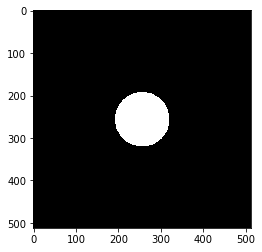

In [40]:
Hideal = ideal(512,512,64)
plt.imshow(Hideal, cmap='gray')
plt.show()

b) **def butter(M,N,n,D0)**, que retornará o filtro de *Butterworth* de grau $n$.

In [37]:
def butter(M,N,n,D0):
    D = get_D(M,N)
    return 1/(1+(D/D0)**(2*n))

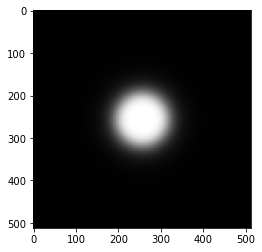

In [41]:
Hbutter = butter(512, 512, 3, 64)
plt.imshow(Hbutter, cmap='gray')
plt.show()

c) **def gauss(M,N,D0)**, que retorna o filtro gaussiano passa-baixa com variância $D_0^2$

In [24]:
def gauss(M,N,D0):
    D = get_D(M,N)
    return np.exp(-D**2/(2*(D0**2)))

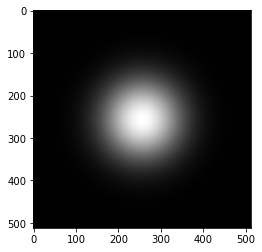

In [42]:
Hgauss = gauss(512, 512, 64)
plt.imshow(Hgauss, cmap='gray')
plt.show()

### 2) Utilizar **Lena.png**, e aplicar os filtros que você implementou em 1a, 1b e 1c

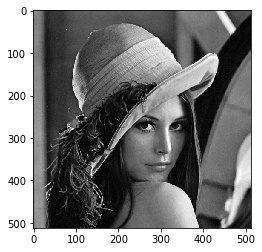

In [26]:
img = imageio.imread('Lena.png')[:,:,0]
plt.imshow(img, cmap='gray')
plt.show()

### Filtro passa-baixa ideal

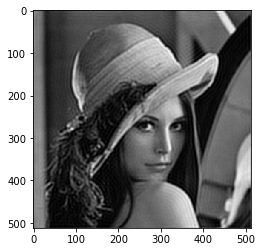

In [43]:
freq = fft2(img)
filtered = fftshift(freq)*ideal(512, 512, 64)
result = ifft2(filtered)
plt.imshow(abs(result), cmap='gray')
plt.show()

### Filtro Butterworth

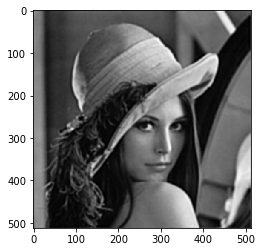

In [45]:
freq = fft2(img)
filtered = fftshift(freq)*butter(512, 512, 3, 64)
result = ifft2(filtered)
plt.imshow(abs(result), cmap='gray')
plt.show()

### Filtro Gaussiano

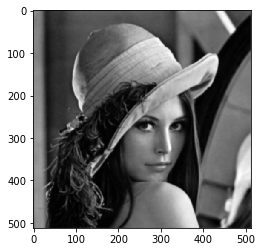

In [46]:
freq = fft2(img)
filtered = fftshift(freq)*gauss(512, 512, 64)
result = ifft2(filtered)
plt.imshow(abs(result), cmap='gray')
plt.show()

### 3) Agora, defina a novas versões para as funções 1a, 1  e 1c de forma a retornar filtros "passa-banda" com limiares $D_0$ e $D_1$ onde $D_1>D_0, D\in[D_0,D_1]$ 